# Big Data Project: House Prices - Advanced Regression Techniques

The showcased work consists in the Kaggle competition __[House Prices - Avanced Regression Techniques]([http://url](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques))__ where the challenged are asked to perform a predictive analysis on the market value of real estate assets on the basis of a number of descriptive variables regarding a variety of the properties' characteristics, which affect their sale price in different measures.

![banner](./imgs/housesbanner.png)

The provided __[dataset](http://jse.amstat.org/v19n3/decock.pdf)__ (De Cock, 2011) is composed of `csv` files containing information on the housings of the city of __[Ames](https://www.google.com/maps/place/Ames,+IA,+USA/@42.0258192,-93.6964163,12z/data=!3m1!4b1!4m5!3m4!1s0x87ee70624634a06b:0x273156083cc75200!8m2!3d42.0307812!4d-93.6319131)__, in the Iowa U.S. state. In addition to the dataset, a detailed __[description](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)__ of the individual fields is given:

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

Particularly, Kaggle provides the dataset description `data_description.txt` and the files `train.csv` and `test.csv`, those required respectively for the training of the predictive model and the final evaluation (which the score of the competition will be calulated upon). The two `csv` documents have the exact same structure, except of coruse for the **SalePrice** column, not present in `test.csv`, which is associated with the target variable that will need to be predicted by the developed model.

This is a regression problem, where the data preparation and analysis to feed to the training stage happens to be just as crucial, as the model's structure choice itself, as there is a significant number of field for each record (79) and a not so thorough missing/erroneous data imputation, just like the choice of feature that are not relevant in terms of value prediction, may appreciably hinder the efficacy of the used regressors.

## 0. Working environment and technologies 
The data analysis and model training are entirely realized through Python (v3.8.2) through the appropriate APIs for interfacing with the Big Data technologies for storage and distributed processing.

Specifically, the framework used for the implementation of Big Data architectures is made up of:
- ``Hadoop Distributed File System`` (HDFS v3.3.0) for the distributed management of the repositories containing the IO files, along with those associated with intermediate computations. **Note**: the Hadoop cluster, in this case, is composed of just one node, as the size of the working dataset is of few hundreds of kB (460.68 kB for `train.csv` and 451.41 kB for `test.csv`), which clearly fits within one standard 128 MB HDFS block.
- ``Apache Spark`` (v3.3.0) as distributed data processing engine with the corresponding `pyspark` Python API, contaning both the data analysis functionalities based on the DataFrame (and Resilient Distributed Dataset) technologies (as for `pyspark.sql`), and the __[most common machine learning algorithms](https://spark.apache.org/docs/latest/ml-guide.html)__ (localized in `pyspark.ml`).

The analysis and processing on the dataset are for the great majority carried out through the direct functionalities provided by `pyspark`, which autonomously manages the distributed execution on cluster, together with resource and job-completion state monitoring. In some instances, it will also be necessary to take advantage of the additional features of `pandas` DataFrames, which, despite the shared nature with Spark DFs, have a better compatibility with some secondary data analysis tools such as those for visualization (`matplotlib` e `seaborn`). That being said, the usage of `pandas` is still kept restricted, as the `toPandas()` method that performs the conversion between Spark and `pandas` DFs  __[moves both data storage and processing locally](https://stackoverflow.com/questions/29226210/what-is-the-spark-dataframe-method-topandas-actually-doing)__, effectively voiding the distribution and parallelization of all of the subsequent computations. In a real, practical Big Data scenario this is of course not ideal, since the single local machine may not possess the resources required to internally manage an amount of data that was before distributed over a cluster of multiple devices. This is the reason why, in order to remain close to a practical Big Data analysis architecture, `toPandas()` will only be invoked in few occasions and on limited subsets of the complete dataset (e.g., selections, projections, aggregations, etc.).

The project will be entirely described in this Jupyter notebook, using Markdown to discuss the motivations for the architectural choices of the analysis and also to comment on the obtained results, leaving to Python comments within the code cells the details of the implementation.

## 1. Environment setup

### 1.1 HDFS
Once Hadoop has been installed and configured on Windows, its components are fired up by executing the DOS script contained in `start-dfs.cmd`, which instantiates the FileSystem, the resource manager, the namenode and the single datanode, all in localhost  (LAPTOP-MQUB85DE):

![datanode](./imgs/datanode_gui.png)

In order to retrieve all of the working material that Kaggle provides it is possible to use the appropriate __[API](https://github.com/Kaggle/kaggle-api)__ with the command
```bash
 > kaggle competitions download -c house-prices-advanced-regression-techniques
```
populating the Hadoop FS is then done with `hdfs dfs -put /local/path/to/data /hdfs/path/`, resulting in a structure like 

![datapaths](./imgs/datapaths.png)

### 1.2 Spark
The Spark setup is done with the usual prologue to retrieve the path of the executable and instantiate the `SparkSession`:

In [1]:
import findspark 

location = findspark.find()
findspark.init(location)

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HousePrices - S. Zammuto').getOrCreate()

# session info visualization
spark.sparkContext

<SparkContext master=local[*] appName=HousePrices - S. Zammuto>

To complete the initialization of all of the tools that we will need and for the sake of centralizing the list of the invoked APIs, all of the required components will be imported followingly.

In [2]:
# utility functions that operate on whole columns of Spark DFs
from pyspark.sql.functions import col, when, count, isnan, isnull, expr, create_map, lit
from pyspark.sql.functions import log, exp, skewness

# required libraries for the creation and execution of the training pipeline, together with the result evaluation
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import IndexToString
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# other stuff
import numpy as np
from math import floor
from itertools import chain
from pyspark.ml.stat import Correlation

## 2. Data analysis
This section is dedicated to the analysis of the provided dataset, with a special focus on data cleaning and feature engineering to select the relevant features that will be fed to the subsequent model training stage.

### 2.1 Explorative analysis
As a first step, we take advantage of the instatiated `SparkSession` to read the dataset directly from HDFS and then associate the respective Spark DFs to it.

In [3]:
# both the csv files have a header line with the schema of the record fields, so that the
# structure can be automatically inferred by setting the parameter inferSchema=True 

datasets = {'trainDF': spark.read.csv('hdfs://localhost:9000/bigdata/houseprices/datasets/train.csv', header=True, inferSchema=True),
            'testDF': spark.read.csv('hdfs://localhost:9000/bigdata/houseprices/datasets/test.csv', header=True, inferSchema=True)}

In [4]:
# trainset DF metadata visualization to check if it was read correctly
datasets['trainDF'].printSchema()
print(f"Number of lines of the trainset: {datasets['trainDF'].count()}")

# this is one of the few cases where we use the toPandas() method, with the following justifications:
#   - before the conversion, just the first 10 DF records are extracted (with limit(10)) so that the local view 
#     stores a minimum fraction of the data;
#   - the visualization layout of a pandas DF has a horizontal scrollbar that appears 'cleaner' with respect to 
#     pyspark's df.show(), which performs column wrapping when they don't fit within the screen.
datasets['trainDF'].limit(10).toPandas().style.hide(axis='index')

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,307000
8,60,RL,NA,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NA,NA,NA,0,1,2008,W

In [5]:
# the same is done fore the testset
datasets['testDF'].printSchema()
print(f"Number of lines of testset: {datasets['testDF'].count()}")
datasets['testDF'].limit(10).toPandas().style.hide(axis='index')

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,NA,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,NA,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,NA,NA,NA,0,6,2010,WD,Normal
1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,Y,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,1992,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,NA,NA,NA,0,1,2010,WD,Normal
1466,60,RL,75,10000,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,763,763,GasA,Gd,Y,SBrkr,763,892,0,1655,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993,Fin,2,440,TA,TA,Y,157,84,0,0,0,0,NA,NA,NA,0,4,2010,WD,Normal
1467,20,RL,NA,7980,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0,TA,Gd,PConc,Gd,TA,No,ALQ,935,Unf,0,233,1168,GasA,Ex,Y,SBrkr,1187,0,0,1187,1,0,2,0,3,1,TA,6,Typ,0,NA,Attchd,1992,Fin,2,420,TA,TA,Y,483,21,0,0,0,0,NA,GdPrv,Shed,500,3,2010,WD,Normal
1468,60,RL,63,8402,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,789,789,GasA,Gd,Y,SBrkr,789,676,0,1465,0,0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998,Fin,2,393,TA,TA,Y,0,75,0,0,0,0,NA,NA,NA,0,5,2010,WD,Normal
1469,20,RL,85,10176,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0,TA,TA,PConc,Gd,TA,Gd,GLQ,637,Unf,0,663,1300,GasA,Gd,Y,SBrkr,1341,0,0,1341,1,0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990,Unf,2,506,TA,TA,Y,192,0,0,0,0,0,NA,NA,NA,0,2,2010,WD,Normal
1470,20,RL,70,8400,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,TA,TA,No,ALQ,804,Rec,78,0,882,GasA,TA,Y,SBrkr,882,0,0,882,1,0,1,0,2,1,TA,4,Typ,0,NA,Attchd,1970,Fin,2,525,TA,TA,Y,240,0,0,0,0,0,NA,MnPrv,NA,0,4,2010,WD,Normal


#### 2.1.1 Numerical and categorical variables
As it can be seen from the output of `printSchema()`, every field of the dataset is `nullable` with inferred data types `string` or `integer`. This means that the dataset can contain null values and that both numerical and categorical variables are present, and they will need to be managed separately.

A first estimation of the separation betweeen the two kinds of variables can be done by checking the `dtype` inferred by Spark for `trainDF`:

In [6]:
init_cat_vars_est = [item[0] for item in datasets['trainDF'].dtypes if item[1].startswith('string')]
print(f'Initial estimation of the number of categorical variables: {len(init_cat_vars_est)}\n {init_cat_vars_est}')

Initial estimation of the number of categorical variables: 46
 ['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [7]:
# the set of numerical variables is the complement of that of categorical variables, except for the 'Id' 
# field, which, despite being numeric, does not provide additional useful information on the records
init_num_vars_est = [var for var in datasets['trainDF'].columns if var not in init_cat_vars_est and var != 'Id']
print(f'Initial estimation of the number of numerical variables: {len(init_num_vars_est)}\n {init_num_vars_est}')

Initial estimation of the number of numerical variables: 34
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Despite this automatic parsing may give a general overview on the distribution of the data types distribution, the cross-reference with the information provided by the Kaggle platform* suggests some inaccuracies on the performed estimation. As an example, the `trainDF` fields **LotFrontage**, **MasVnrArea**, and **GarageYrBlt**, even though they were put within `init_cat_vars_est`, are actually numerical variables, and they have been parsed as strings since, in this dataset, the instances of missing (numerical) data are encoded with `NA`, which is not a Python keyword (as `None` is) and is therefore interpreted as a set of characters.

The same holds, in `testDF`, for the features **BsmtFinSF1**, **BsmtFinSF2**, **BsmtUnfSF**, **TotalBsmtSF**, **BsmtFullBath**, **BsmtHalfBath**, **GarageCars** e **GarageArea**.

On the basis of these considerations, it is possible to fix each misclassified column to its correct data type.

*For example, it is straightforward to recognize a numerical feature if its name has the suffix **\[...\]Area** or **\[...\]SF** (Square Feet).<br/>

In [8]:
cat_to_num_vars_train = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_to_num_vars_test = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                            'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

cat_to_num_vars = cat_to_num_vars_train + cat_to_num_vars_test

# categorical -> numeric conversion in each DF and for each element of cat_to_num_vars
for name in datasets.keys():
    for var in cat_to_num_vars:

        # 'NA' instances are replaced with None
        datasets[name] = datasets[name].withColumn(var, \
                                            when(datasets[name][var] == 'NA', None).\
                                            otherwise(datasets[name][var]))

        # once the 'NA' strings have been removed, it is possible to cast the column type to a numerical one
        # for which double is chosen in order to mantain the maximum possible precision
        datasets[name] = datasets[name].withColumn(var, col(var).cast('double'))

On the contrary, it is also possible that some numerical varaibles that ancode a class subdivision are categorical, as it happens for 
MSSubClass, which is described in `data_description.txt` as:
```
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
```

In [9]:
# in this case, there is no need to account for 'NA' values since:
#   - from the Kaggle documentation, there are no null values (explicitly encoded) in the MSSubClass column;
#   - even if some None values were present, they will be dealt with in the subsequent phases.
for name in datasets.keys():
    datasets[name] = datasets[name].withColumn('MSSubClass', col('MSSubClass').cast('string'))

Now we have the cartainty that both `trainDF` and `testDF` have the exact same schema and same variable types, except for the **SalePrice** target.

In [10]:
# fixing the initial estimation list on the trainset through the transformed DF
cat_vars_est = [item[0] for item in datasets['trainDF'].dtypes if item[1].startswith('string')]
num_vars_est = [var for var in datasets['trainDF'].columns if var not in cat_vars_est and var != 'Id']

print(f'New estimation of the number of categorical variables in trainDF: {len(cat_vars_est)}\n {cat_vars_est}')
print(f'\nNew estimation of the number of numerical variables in trainDF: {len(num_vars_est)}\n {num_vars_est}')

New estimation of the number of categorical variables in trainDF: 44
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

New estimation of the number of numerical variables in trainDF: 36
 ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'B

In [11]:
# checking the correspondence with the dataset types
cat_vars_est_t = [item[0] for item in datasets['testDF'].dtypes if item[1].startswith('string')]
num_vars_est_t = [var for var in datasets['testDF'].columns if var not in cat_vars_est and var != 'Id']

print(f'New estimation of the number of categorical variables in testDF: {len(cat_vars_est_t)}\n {cat_vars_est_t}')
print(f'\nNew estimation of the number of numerical variables in testDF: {len(num_vars_est_t)}\n {num_vars_est_t}')

New estimation of the number of categorical variables in testDF: 44
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

New estimation of the number of numerical variables in testDF: 35
 ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bed

It will also be necessary to consider that, in the variables that are indeed categorical, `NA` does not always mean `None`, since for some of those features, it needs to be interpreted as 'absence (in the habitation) of the characteristic to be categorized' and not as 'missing data'. This is also explicited in `data_description.txt`, where, for example, `NA` in **Fence** has the meaning of 'fence not present':

```
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
```

#### 2.1.2 **SalePrice** target analysis
**SalePrice** is the target variable of our prediction task, that which the regressor model will be trained on. As a numerical single variable, it is possible to study its distribution within the dataset by analysing the values on `trainDF`.

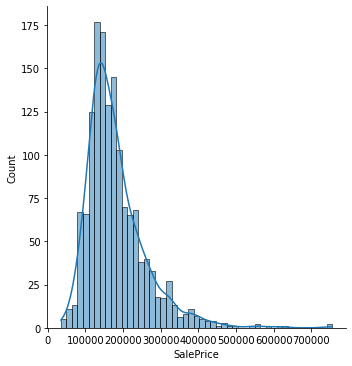

In [12]:
# the values from the SalePrice column are extracted and stored on a list, which will be passed to the visualization tool
sale_prices = [row['SalePrice'] 
        for row in datasets['trainDF'].select('SalePrice').collect()]

# the retreive data are plotted on a seaborn displot, setting 
# the parameter kde=True to overlay the distribution trend
sns.displot(sale_prices, kde=True)
plt.xlabel("SalePrice");

The estimate of **SalePrice**'s distribution was evaluated through a __[Kernel Density Estimation (KDE)](https://mathisonian.github.io/kde/)__, defined as

$$ \hat{f}(x) = \sum_{observations} K\left( \displaystyle\frac{x - observation}{bandwidth}\right)$$

where *bandwidth* is the standard deviation of the smoothing kernel $K$, which is gaussian in the case of `seaborn`'s KDE. We know that we can exploit the default *bandwidth* of the algorithm as it is known to behave well in situations where the real distribution is __[smooth, unimodal and bell-shaped](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)__, as in this case.

Graphically, it can be seen that the distribution of **SalePrice** has a non-insignificant skweness, equal to

In [13]:
print(f"Skewness of SalePrice: {datasets['trainDF'].select(skewness('SalePrice')).collect()[0][0]}")

Skewness of SalePrice: 1.8809407460340333


that can be reduce by performing a __[Log-transformation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/)__ on the starting distribution. This operation is almost necessary in our case, as a great deal of regression models work on the hypothesis that the dependent variable is normally distributed, and __[the presence of skweness in the data may propagate into the distribution of the errors](https://stats.stackexchange.com/questions/299154/the-benefit-of-unskewing-skewed-data)__, altering the evaluation stage of the regressor.

In [14]:
datasets['trainDF'] = datasets['trainDF'].withColumn('SalePrice', log(col('SalePrice')))

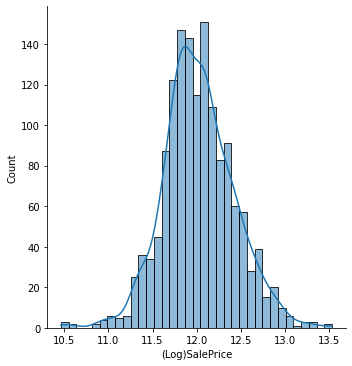

In [15]:
# just as before, the tansformed column is extracted and visualized
unskewed_prices = [row['SalePrice'] 
        for row in datasets['trainDF'].select('SalePrice').collect()]

sns.displot(unskewed_prices, kde=True)
plt.xlabel("(Log)SalePrice");

We obtained what we were looking for: the dependencies of **SalePrice** are mantained on a distribution that is closer to a normal one, with a significantly reduced skewness.

In [16]:
print(f"Skewness of (Log)SalePrice: {datasets['trainDF'].select(skewness('SalePrice')).collect()[0][0]}")

Skewness of (Log)SalePrice: 0.12121036730136245


### 2.2 Correlation of numerical features
In order to perform the feature selection with respect to numerical data, it can be useful to evaluate those variables that are somehow correlated with the values of **SalePrice**. Following this line, a 'high' value of a statistical correlation metric can be the manifestation of a strong dependence of those numerical features with the target. Particularly, we will be taking advantage of the  __[Spearman correlation](https://www.jstor.org/stable/1412159?origin=crossref&seq=1)__ for its better nonlinear correlation detection behavior with respect to the traditional __[Pearson correlation](https://royalsocietypublishing.org/doi/10.1098/rspl.1895.0041)__.

Specifically, the Spearman correlation coefficient $r_s$ is defined upon the Pearson coefficient $\rho_{R(X),R(Y)}$ between the ranks $R(X), R(Y)$ of the input variables $X,Y$:

$$ r_s = \rho_{R(X),R(Y)} = \frac{cov(R(X),R(Y))}{\sigma_{R(X)}\sigma_{R(Y)}} $$

This is what the `corr()` method parametrized with `spearman` methodology of the class `Correlation` of the `pyspark.ml.stat` module is based on, which we will use to visualize the compelte correlation matrix on the numerical varaibles.

In [17]:
# the corr() method needs input column of type Vector, which we will generate with pyspark.ml.feature.VectorAssembler
vector_col = 'corr_features'
assembler = VectorAssembler(inputCols=num_vars_est, outputCol='corr_features')
df_vector = assembler.transform(datasets['trainDF'].dropna(how="any", subset=num_vars_est)).select(vector_col)

# evaluation of the correlation matrix
corr_matrix = Correlation.corr(df_vector, vector_col, method='spearman').collect()[0][0].toArray().tolist()

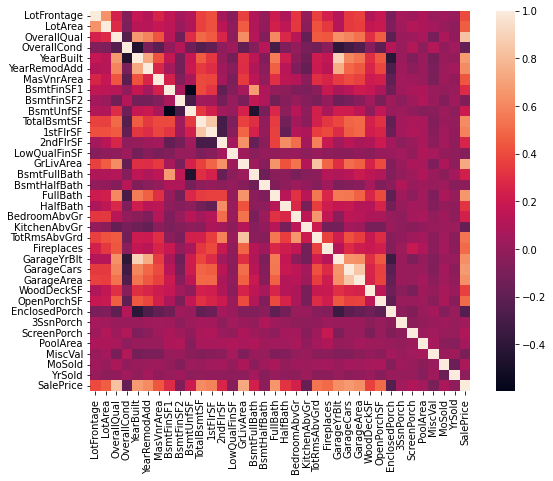

In [18]:
# visualization of the heatmap on the correlations: the lighter the color gradient,
# the bigger the correlation coefficient between the variables
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, xticklabels=num_vars_est, yticklabels=num_vars_est, square=True);

Out of the entire correlation matrix, we are actually interested only on the last row (or column, as it is symmetric), that associated with the correlations with **SalePrice**. Out of those values, those that are bigger than a certain threshold will be extracted, since they are associated with a variable with a strong dependence with **SalePrice**.

In [19]:
# setting the threshold
corr_threshold = 0.3

# extracting the last row of the correlation matrix, that related to SalePrice 
saleprice_corr = corr_matrix[-1]

# extracting the feature with the higher correlation (> corr_threshold) with SalePrice
high_corr_num_vars = [num_vars_est[i] 
    for i in [idx for idx in range(len(saleprice_corr)) if saleprice_corr[idx] > corr_threshold] if num_vars_est[i] != 'SalePrice']

print(f"{len(high_corr_num_vars)} numerical variables mostly correlated with SalePrice:\n {high_corr_num_vars}")

18 numerical variables mostly correlated with SalePrice:
 ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


### 2.3 Analysis of high-correlation variables
Among all of the numerical features, the 18 mostly correlated with **SalePrice** are selected. Because of their importance, a more in-depth analysis on them is required, dissecting their distribution and looking for outliers or missing values.

As previously seen, the high correlation with **SalePrice** suggests some sort of dependence between the variables, which is possible to deduce also from the visualization of the scatterplot between the individual features and the target.

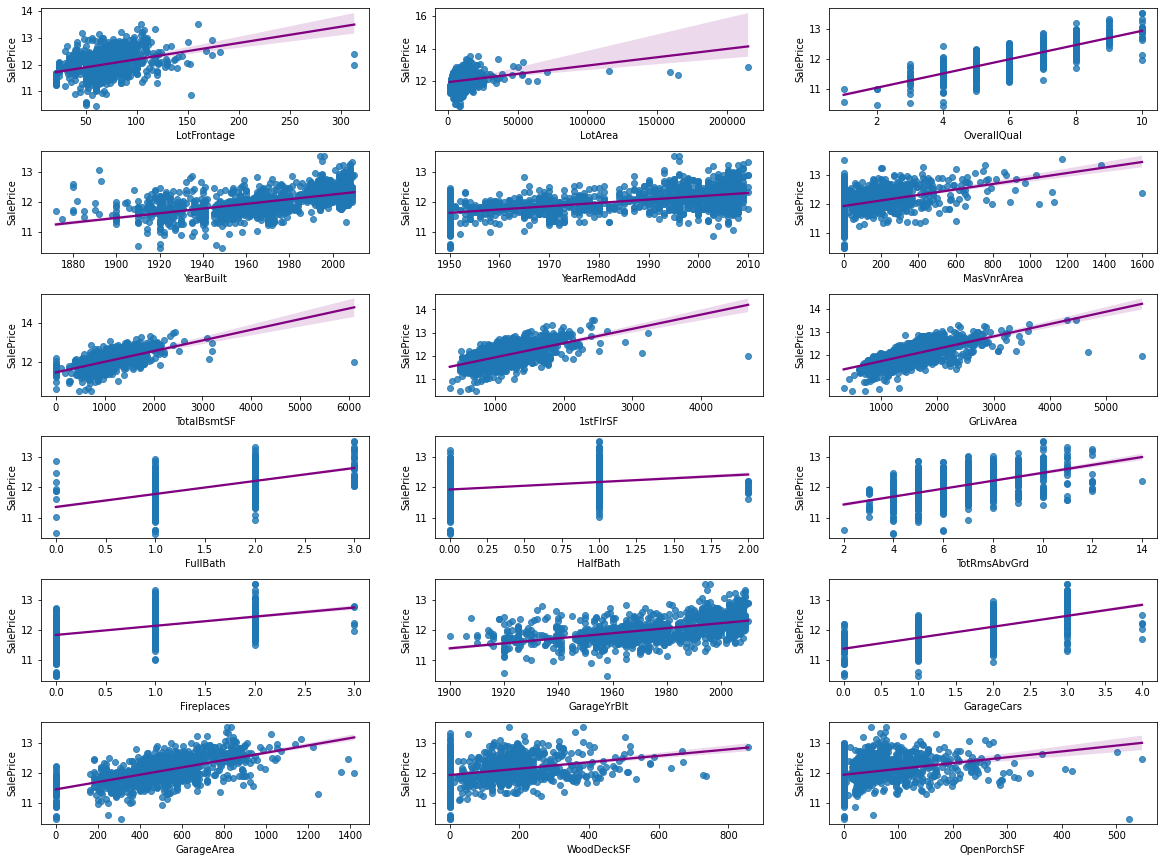

In [20]:
# here regplot will be used, as it allows to also visualize the linear regression of the input over the traditional scatterplot;
# the final figure is made up of the individual subplots evaluated on the single columns, which is the reason why once again 
# the toPandas() method was used, other than its better compatibility with seaborn

fig, axes = plt.subplots(6, 3, figsize = (20, 15))
fig.subplots_adjust(hspace=0.4)
for idx, high_corr_var in enumerate(high_corr_num_vars):
    sns.regplot(x=high_corr_var, y='SalePrice', 
                data=datasets['trainDF'].select(high_corr_var, 'SalePrice').toPandas(), 
                ax=axes[(idx//3), idx%3], line_kws={'color': 'purple'})

#### 2.3.1 Outlier analysis
The observation on the scatterplots, particularly on the evaluated regressions, confirms a correlation between the variables and **SalePrice**. In addition, it is also possible to directly spot some of the outliers that diverge from the general trend, as it happens for **LotFrontage**, **LotArea**, **MasVnrArea**, **TotalBsmtSF**, **1stFlrSF**, **GrLivArea**, **GarageArea** e **OpenPorchSF**. The dirty records will then be removed through a filtering based on thresholds deduced directly from the graphs. Other than those, it is possible that some additional values may not exactly follow the trend, however, in order to minimize the number of deleted records, and, mainly, to avoid overfitting in training, the outlier management is purposefully mantained in a 'lazy' manner.

In [21]:
# deletion of the records with outliers through the selection with filter()
datasets['trainDF'] = datasets['trainDF'].filter((col('LotFrontage') < 200) &
                                                 (col('LotArea') < 20000) &
                                                 (col('MasVnrArea') < 1500) &
                                                 (col('TotalBsmtSF') < 4000) &
                                                 (col('1stFlrSF') < 3500) & 
                                                 (col('GrLivArea') < 4670) &
                                                 (col('GarageArea') < 1240))

The new scatterplot shows the cleaned relationship between the numerical variables with **SalePrice**

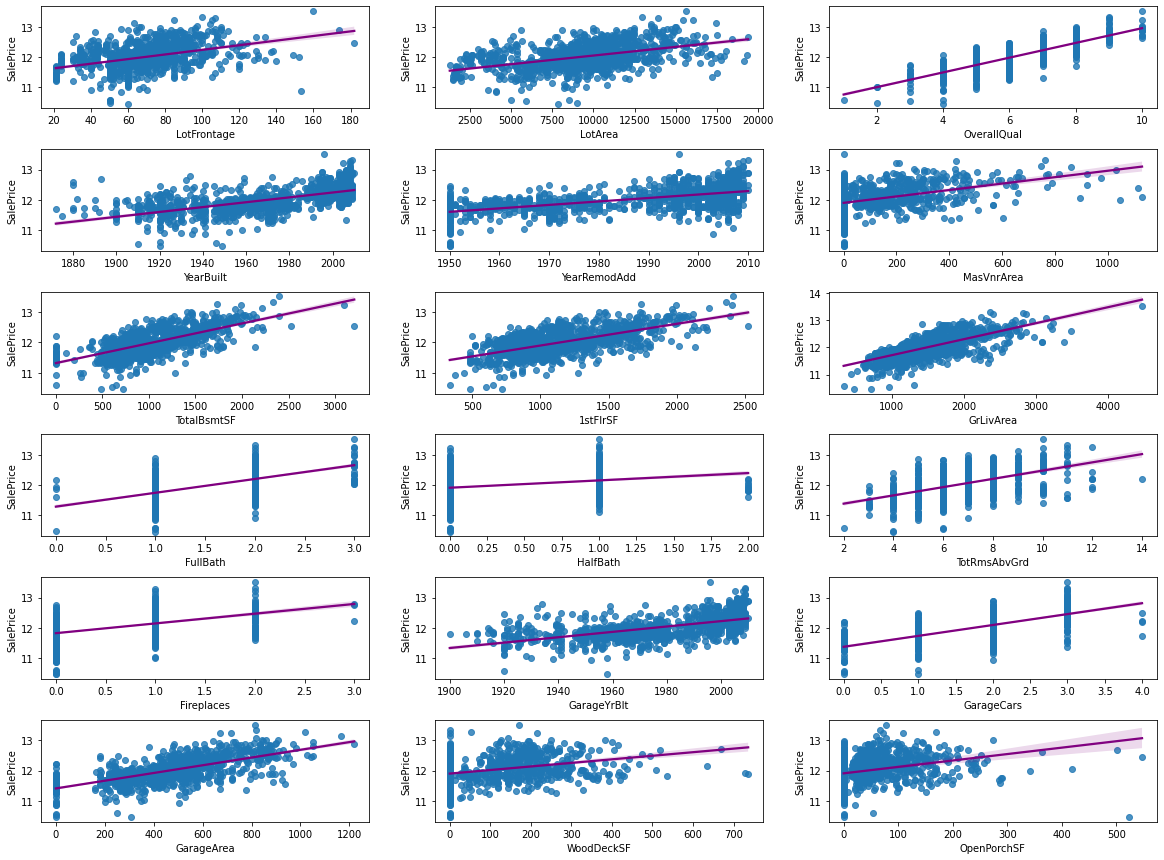

In [22]:
fig, axes = plt.subplots(6, 3, figsize = (20, 15))
fig.subplots_adjust(hspace=0.4)
for idx, high_corr_var in enumerate(high_corr_num_vars):
    sns.regplot(x=high_corr_var, y='SalePrice', 
                data=datasets['trainDF'].select(high_corr_var, 'SalePrice').toPandas(), 
                ax=axes[(idx//3), idx%3], line_kws={'color': 'purple'})

#### 2.3.2 Numerical feature selection 
The studies and elaborations carried out so far have allowed us to extract the numerical variables that are of significance for our problem, and we are now ready to start slimming down the datasets by removing the columns with low correlation and leaving only those present in `high_corr_num_vars`.

In [23]:
# selecting the numerical columns not belonging to high_corr_num_vars
low_corr_num_vars = [var for var in num_vars_est if var not in high_corr_num_vars and var != 'SalePrice']

print(f'Variabili a bassa correlazione:\n {low_corr_num_vars}')

Variabili a bassa correlazione:
 ['OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [24]:
# dropping the columns in low_corr_num_vars
for name in datasets.keys():
    datasets[name] = datasets[name].drop(*low_corr_num_vars)

### 2.4 Missing values
Once the null values have been encoded with `None` and the remaining data have been cleaned, it is possible to fully exploit the `pyspark` methods for missing value detection. Particularly, in the case that one field has a high amount of nulls (with respect to the total), our main strategy will be that of directly dropping the entire column. If, on the other hand, the missing values are fewer, dropping the relative column may cause the loss of valuable information for the final price predicition; it follows that, in this case, a more detailed analysis will be necessary for the imputation of such data.

In [25]:
# here we implement, in Spark, the behavior of pandas.DataFrame.isnull

# this UDF substitutes True or False in the instances of null values, NA and None 
def is_null(df):
    return df.select([(isnan(col(column)) | isnull(col(column))) for column in df.columns])

# for each dataset, a new DataFrame is created through the transform() method parametrized
# with the defined UDF; then, the fields' names are brought back to the originals
nullDS = {name: datasets[name].transform(is_null).toDF(*datasets[name].columns) for name in datasets.keys()}

In [26]:
# the null values of each column are counted and those where at least
# 1 such value is present is extracted and stored separately
def count_nulls(df):
    has_null = []
    for column in df.columns:
        null_count = df.where(col(column) | col(column).isNull()).count()
        if null_count > 0:
            has_null.append((column, null_count))
    return has_null

nullCountDS = {}
for name, df in nullDS.items():
    
    # for each dataset, a specific DF is created
    nullCountDS[name] = spark.createDataFrame(count_nulls(df), 'columnWithNulls STRING, nullCount INT')

    # a column is added in order to directly visualize the null percentage over the total
    nullCountDS[name] = nullCountDS[name].withColumn("percentage", col('nullCount')/df.count())

    print(f'Valori nulli di {name}:')
    nullCountDS[name].show()

Valori nulli di trainDF:
+---------------+---------+------------------+
|columnWithNulls|nullCount|        percentage|
+---------------+---------+------------------+
|    GarageYrBlt|       74|0.0638481449525453|
+---------------+---------+------------------+

Valori nulli di testDF:
+---------------+---------+--------------------+
|columnWithNulls|nullCount|          percentage|
+---------------+---------+--------------------+
|    LotFrontage|      227| 0.15558601782042494|
|     MasVnrArea|       15| 0.01028101439342015|
|    TotalBsmtSF|        1|6.854009595613434E-4|
|    GarageYrBlt|       78|0.053461274845784786|
|     GarageCars|        1|6.854009595613434E-4|
|     GarageArea|        1|6.854009595613434E-4|
+---------------+---------+--------------------+



From these analysis we notice that **GarageYrBlt** is the only variable with null instances in `trainDF`, whereas `testDF` has missing values in multiple numerical variables (among which **GarageYrBlt**). As previously discussed, since the null instances are few in number, we will need to proceed with a direct columnwise analysis and imputation.

**GarageYrBlt** is the feature with most `NA` values, those associated with the houses that do not have a garage in them, for which the construction year is therefore not available. Our previous plot of **GarageYrBlt** with respect to **Saleprice** showed that, generally, the more recent the garage construction year, the higher the value of the housing; as a consequence, we will numerically impute this missing information by assigning `0` to each `NA` of **GarageYrBlt**, with the idea of keeping this relationship. The gap from the `0` value to the most recent years will be subsequently normalized in the unskweing process of numerical variables.

In [27]:
for name in datasets.keys():
    datasets[name] = datasets[name].fillna(0, ['GarageYrBlt'])

**LotFrontage** has the following definition in `data_description.txt`:
```
LotFrontage: Linear feet of street connected to property
```
which we can impute by calculating the average on the remaining values of the column values.

In [28]:
# we will take advantage of the fillna() method together with the 'avg' aggregation 
# function to fill the missing values with the average on the rest of the column
datasets['testDF'] = datasets['testDF'].fillna(floor(datasets['testDF'].agg({'LotFrontage': 'avg'}).collect()[0][0]), ['LotFrontage'])

**MasVnrArea** is associated with the categorical variable **MasVnrType** in the following manner:
```
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet
```
in addition, if we display the projection on **MasVnrType** and **MasVnrArea**:

In [29]:
datasets['testDF'].filter(col('MasVnrArea').isNull()).select('Id', 'MasVnrType', 'MasVnrArea').show()

+----+----------+----------+
|  Id|MasVnrType|MasVnrArea|
+----+----------+----------+
|1692|        NA|      null|
|1707|        NA|      null|
|1883|        NA|      null|
|1993|        NA|      null|
|2005|        NA|      null|
|2042|        NA|      null|
|2312|        NA|      null|
|2326|        NA|      null|
|2341|        NA|      null|
|2350|        NA|      null|
|2369|        NA|      null|
|2593|        NA|      null|
|2658|        NA|      null|
|2687|        NA|      null|
|2863|        NA|      null|
+----+----------+----------+



we notice how every instance where **MasVnrArea** is `null` correspond to the absence, encoded with `NA`, of the **MasVnrType** feature (with a similar meaning to that of **Fence** discussed in section 2.1.1). It follows that the null values can once again we filled with the `0` values, which, numerically, encodes the same meaning of `NA` for the respective categorical variable.

In [30]:
datasets['testDF'] = datasets['testDF'].fillna(0, ['MasVnrArea'])

Just as before, the visualization of null values on **BsmtFinSF1** (or, equivalently, **TotalBsmtSF**):

In [31]:
datasets['testDF'].filter(col('BsmtFinSF1').isNull()).select('Id', 'BsmtFinType1','TotalBsmtSF').show()

+----+------------+-----------+
|  Id|BsmtFinType1|TotalBsmtSF|
+----+------------+-----------+
|2121|          NA|       null|
+----+------------+-----------+



tells us that the absence of the datum on the size of the basement derives from the absence of the basement itself (`BsmtFinType1 == 'NA'`), which is one more time numericall imputable with `0`.

In [32]:
datasets['testDF'] = datasets['testDF'].fillna(0, ['TotalBsmtSF'])

As for **GarageCars** e **GarageArea**, they are both `null` with respect to the same record:

In [33]:
datasets['testDF'].filter(col('GarageCars').isNull()).select('Id', 'GarageType', 'GarageArea','GarageCars').show()

+----+----------+----------+----------+
|  Id|GarageType|GarageArea|GarageCars|
+----+----------+----------+----------+
|2577|    Detchd|      null|      null|
+----+----------+----------+----------+



however, unlike before, the garage is actually present, since **GarageType** is `Detchd` instead of `NA`:

```
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
```

as a consequence, those two last missing values will be imputed with the average calculated on the non-null values of the other tuples.

In [34]:
datasets['testDF'] = datasets['testDF'].fillna(floor(datasets['testDF'].agg({'GarageArea': 'avg'}).collect()[0][0]), ['GarageArea'])

In [35]:
# here an explicit cast to int is performed, as it makes no sense to deal with non-interege values when
# referring to the capacity of the garage in terms of the number of cars it can contain
datasets['testDF'] = datasets['testDF'].fillna(int(floor(datasets['testDF'].agg({'GarageCars': 'avg'}).collect()[0][0])), ['GarageCars'])

### 2.5 Unskewing
In section 2.1.2 we dealt with the unskewing of the **SalePrice** target variable to improve the efficacy of the machine learning models. The remaining features, those that we have just cleaned and extracted, require the same Log-tranformation treatment as well.

We now visualize the distribution of the individual variables on `trainDF` (on the hypothesis that `testDF` yields the same behaviors):

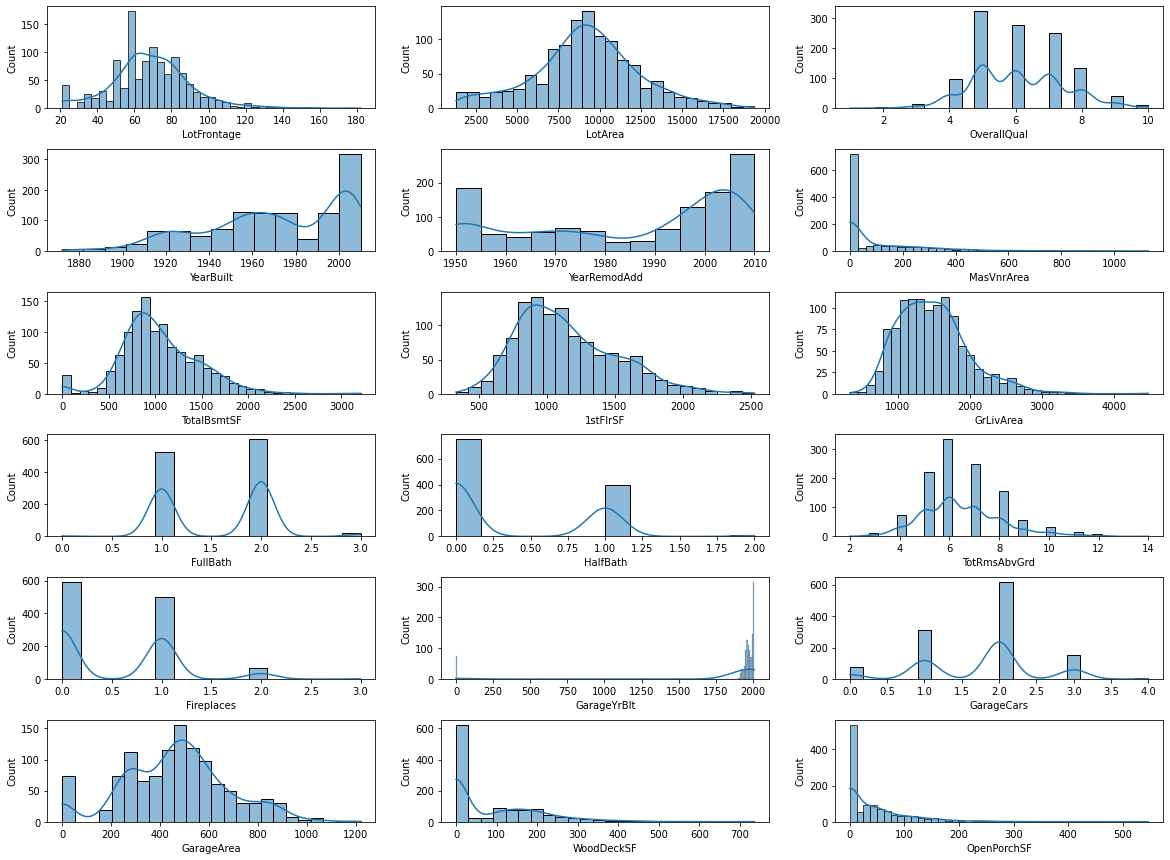

In [36]:
fig, axes = plt.subplots(6, 3, figsize = (20, 15))
fig.subplots_adjust(hspace=0.4)
for idx, high_corr_var in enumerate(high_corr_num_vars):
    vals = [row[high_corr_var] 
        for row in datasets['trainDF'].select(high_corr_var).collect()]
    sns.histplot(data=vals, ax=axes[idx//3, idx%3], kde=True)
    axes[idx//3, idx%3].set(xlabel=high_corr_var)

Just as for **SalePrice**, it is possible to quantify the skewness through the columnwise method `skewness` of the `pyspark.sql.functions` module:

In [37]:
# UDF for the skewness of high-correlation numerical variables
def eval_skew(df):
    skew = []
    for column in high_corr_num_vars:
        col_skew = df.select(skewness(column).alias(column)).collect()[0][0]
        skew.append((column, col_skew))
    return skew

# creating a DF for the skewness of each dataset
skewDS = {}
for name, df in datasets.items():
    skewDS[name] = spark.createDataFrame(eval_skew(df), ['column', 'skewness'])

In [38]:
skewDS['trainDF'].show()

+------------+--------------------+
|      column|            skewness|
+------------+--------------------+
| LotFrontage|  0.5389018521863974|
|     LotArea|0.018162894209256406|
| OverallQual|  0.2092943702206508|
|   YearBuilt|  -0.559786669285063|
|YearRemodAdd| -0.5165899366400509|
|  MasVnrArea|  2.3899019619563355|
| TotalBsmtSF| 0.46548573953108974|
|    1stFlrSF|  0.7144665067838104|
|   GrLivArea|  0.9215097156194803|
|    FullBath| 0.06916102017039837|
|    HalfBath|  0.7807115143455075|
|TotRmsAbvGrd|  0.6911156509572145|
|  Fireplaces|  0.7117172654385089|
| GarageYrBlt| -3.5518603214261635|
|  GarageCars| -0.2927547616233367|
|  GarageArea|-0.00769246832408...|
|  WoodDeckSF|  1.4563827802676623|
| OpenPorchSF|   2.527985595144266|
+------------+--------------------+



In [39]:
skewDS['testDF'].show()

+------------+--------------------+
|      column|            skewness|
+------------+--------------------+
| LotFrontage|  0.7325097168411175|
|     LotArea|    3.11201293972186|
| OverallQual| 0.18100967980519436|
|   YearBuilt| -0.5870522646411163|
|YearRemodAdd|-0.39949472741730246|
|  MasVnrArea|  2.5469466160213985|
| TotalBsmtSF|  0.8042383390151242|
|    1stFlrSF|  1.5565921331805246|
|   GrLivArea|    1.12923991364573|
|    FullBath|  0.2955344004426562|
|    HalfBath|   0.713992526233611|
|TotRmsAbvGrd|  0.8417309232677174|
|  Fireplaces|  0.8190151321542428|
| GarageYrBlt| -3.9479536778533775|
|  GarageCars|-0.10559017298700615|
|  GarageArea|  0.3000400149749438|
|  WoodDeckSF|  2.1285686872921277|
| OpenPorchSF|   2.685014751482742|
+------------+--------------------+



From the observation of the plots and the quantified skewness, we confirm that some of the variables under study may indeed benefit from a transformation that normalizes its distribution; particularly, those features are **LotFrontage**, **MasVnrArea**, **BsmtFinSF1**, **TotalBsmtSF**, **1stFlrSF**, **GrLivArea**, **TotRmsAbvGrd**, **GarageArea**, **WoodDeckSF**, and **OpenPorchSF**.

In [40]:
vars_to_be_unskewed = ['LotFrontage', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GarageYrBlt',
                        'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

In [41]:
for name in datasets.keys():
    for column in vars_to_be_unskewed:
        datasets[name] = datasets[name].withColumn(column, log(col(column)))

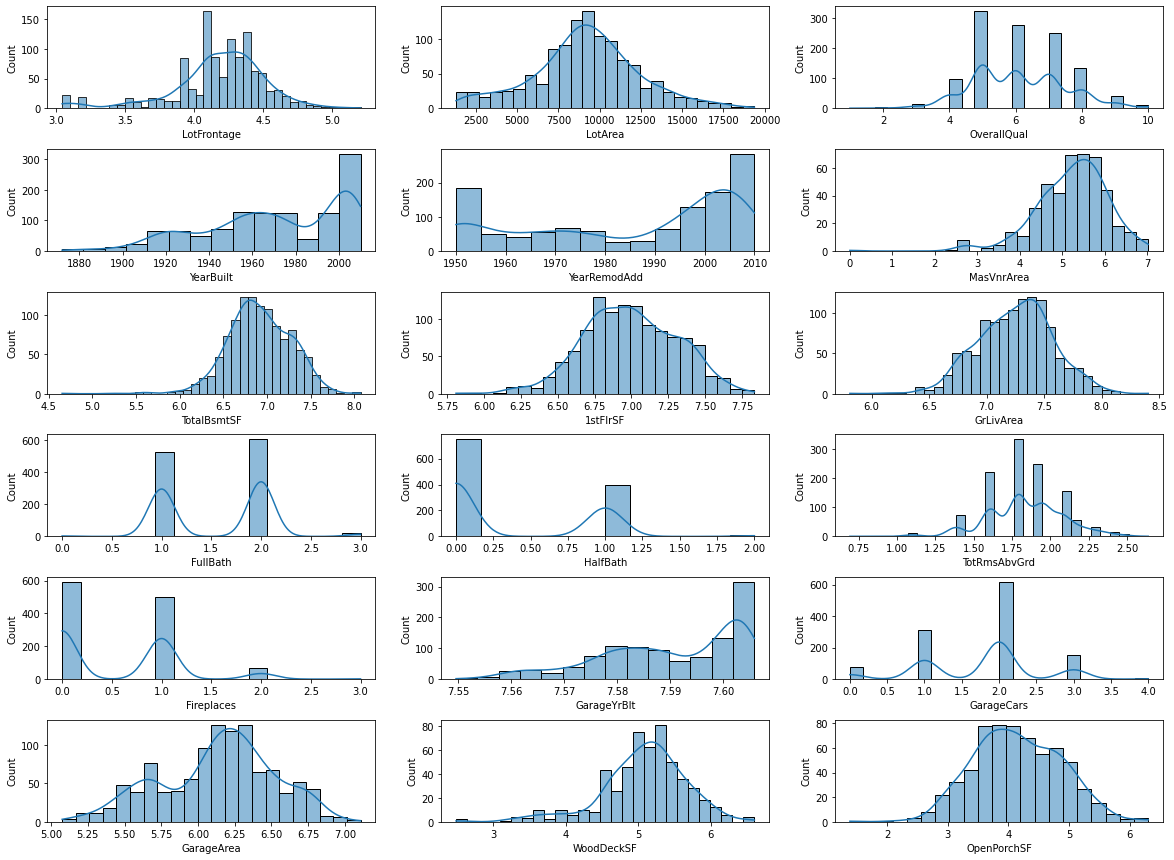

In [42]:
fig, axes = plt.subplots(6, 3, figsize = (20, 15))
fig.subplots_adjust(hspace=0.4)
for idx, high_corr_var in enumerate(high_corr_num_vars):
    vals = [row[high_corr_var] 
        for row in datasets['trainDF'].select(high_corr_var).collect()]
    sns.histplot(data=vals, ax=axes[idx//3, idx%3], kde=True)
    axes[idx//3, idx%3].set(xlabel=high_corr_var)

From a graphical standpoint, we can observe that, even though non perfectly normal, the behavior of the distribution has improved. In the case that these variables need further processing, we will just need to remember to get back to their original values (by exponentiation) before performing the operations, and then again Log-transform them right after.

### 2.6 Categorical feature selection
We saw that categorical attributes do not have null values. This still does not mean that all of the columns of this kind are relevant in terms of the **SalePrice** prediction; as a matter of fact, in more than one instance, there are qualitative features that have the same value for a great percentage of records (`NA` is one of such values):

In [43]:
# just as before, each NA value is counted for each column and the fields there this number is > 0 are extracted
# come prima, conto i valori NA di ogni colonna ed estraggo i campi in cui c'è un conteggio > 0
def count_na(df):
    has_null = []
    for column in df.columns:
        null_count = df.where(col(column) == 'NA').count()
        if null_count > 0:
            has_null.append((column, null_count))
    return has_null

naCountDS = {}
for name, df in datasets.items():
    naCountDS[name] = spark.createDataFrame(count_na(df), 'columnWithNAs STRING, NACount INT')
    naCountDS[name] = naCountDS[name].withColumn('percentage', col('NACount')/df.count())

    print(f'Valori NA di {name}')
    naCountDS[name].show()

Valori NA di trainDF
+-------------+-------+--------------------+
|columnWithNAs|NACount|          percentage|
+-------------+-------+--------------------+
|        Alley|   1075|  0.9275237273511648|
|     BsmtQual|     30|0.025884383088869714|
|     BsmtCond|     30|0.025884383088869714|
| BsmtExposure|     31|0.026747195858498704|
| BsmtFinType1|     30|0.025884383088869714|
| BsmtFinType2|     31|0.026747195858498704|
|   Electrical|      1|8.628127696289905E-4|
|  FireplaceQu|    591|  0.5099223468507333|
|   GarageType|     74|  0.0638481449525453|
| GarageFinish|     74|  0.0638481449525453|
|   GarageQual|     74|  0.0638481449525453|
|   GarageCond|     74|  0.0638481449525453|
|       PoolQC|   1155|   0.996548748921484|
|        Fence|    935|  0.8067299396031061|
|  MiscFeature|   1121|  0.9672131147540983|
+-------------+-------+--------------------+

Valori NA di testDF
+-------------+-------+--------------------+
|columnWithNAs|NACount|          percentage|
+------------

It is also possible to display the `NA` values on a barplot:

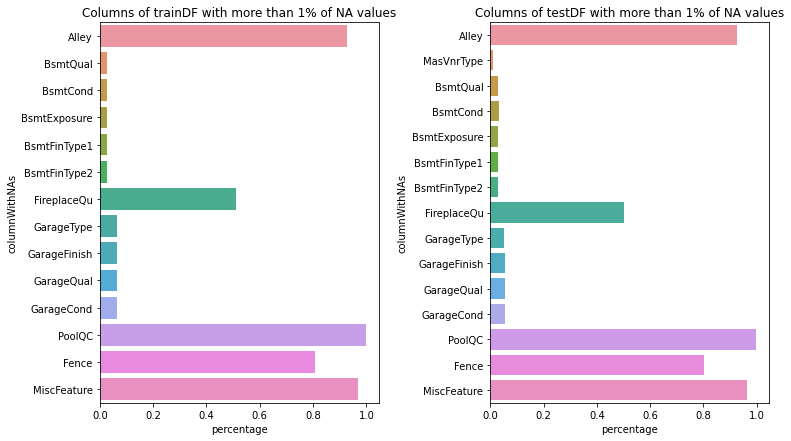

In [44]:
fig, axes = plt.subplots(ncols=2, figsize = (12, 7))
fig.subplots_adjust(wspace=0.4)

# we can use toPandas() since we are visualizing a DF which is the result of an aggregation
for idx, ds in enumerate(naCountDS.items()):
    sns.barplot(x='percentage', y='columnWithNAs',
     data=ds[1].select('columnWithNAs', 'percentage').where(col('percentage') > 0.01).toPandas(),
     ax=axes[idx])
    axes[idx].set_title(f'Columns of {ds[0]} with more than 1% of NA values')
    
plt.show()

Those values will be dealt with the same way as null values, i.e., we will drop the column that have more than 50% of `NA`, since their low variance does not provide useful infromation for the regression task.

In [45]:
# drop of the columns that have more than 50% of null values
# drop delle colonne che hanno più del 50% di valori nulli
for name in datasets.keys():
    columns_to_be_dropped = [row['columnWithNAs'] 
        for row in naCountDS[name].select('columnWithNAs').where(col('percentage') > 0.5).collect()]
    print(f'Columns with most NA values that need to be dropped in {name}: {columns_to_be_dropped}')
    datasets[name] = datasets[name].drop(*(columns_to_be_dropped))
    naCountDS[name] = naCountDS[name].drop(*(columns_to_be_dropped))

    # rimuovo anche i nomi delle colonne dalla lista delle varaibili categoriche
    cat_vars_est = [var for var in cat_vars_est if var not in columns_to_be_dropped]

Columns with most NA values that need to be dropped in trainDF: ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
Columns with most NA values that need to be dropped in testDF: ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


Similarly, from the Kaggle documentation, it is possible to see that the **Street** and **Utilities** columns contain for the most parte the the value (`Pave` and `AllPub`, respectively), and therefore, since they do not contribute to the discrimination of the house price, they can be dropped as well.

In [46]:
unnecessary_cols = ['Street', 'Utilities']
for name in datasets.keys():
    print(f'Further columns to be dropped in {name}: {unnecessary_cols}')
    datasets[name] = datasets[name].drop(*(unnecessary_cols))
    naCountDS[name] = naCountDS[name].drop(*(unnecessary_cols))

    # removing also the names of the columns from the list of the categorical variables
    # rimuovo anche i nomi delle colonne dalla lista delle varaibili categoriche
    cat_vars_est = [var for var in cat_vars_est if var not in unnecessary_cols]

Further columns to be dropped in trainDF: ['Street', 'Utilities']
Further columns to be dropped in testDF: ['Street', 'Utilities']


### 2.7 Feature engineering

#### 2.7.1 **TotLivSF** and **TotBathsArea**
Despite being well detailed, the provided dataset still does not have explicit information on some characteristics that 'logically' affect the value of an habitation. Specifically, as the described int the paragraph **3.** of __[this article](https://www.opendoor.com/w/blog/factors-that-influence-home-value)__ (J. Gomez, 2019), a key parameter in such a case is that related to the total habitable sqaure footage o the house, of which garages, attics and basements are excluded. As a consequence, it will be beneficial to the regressor training to add a **TotLivSF** field to the dataset, containing the total area of habitable surface of the house. Similarly, we will add another column, **TotBathsArea**, to quantify the total surface covered by bathrooms.

In [47]:
for name in datasets.keys():

    # as for TotLivSF, we extract the columns of interest, we exponentiate them, evaluate the total
    # and normalize the new values again through a Log-transformation, in order to store a column where 
    # the skewness is already minimized
    datasets[name] = datasets[name].withColumn('TotLivSF', expr('log(exp(GrLivArea) + exp(TotalBsmtSF))'))

    # a similar procedure goeas for TotBathsArea
    datasets[name] = datasets[name].withColumn('TotBathsArea', expr('FullBath + HalfBath*0.5'))

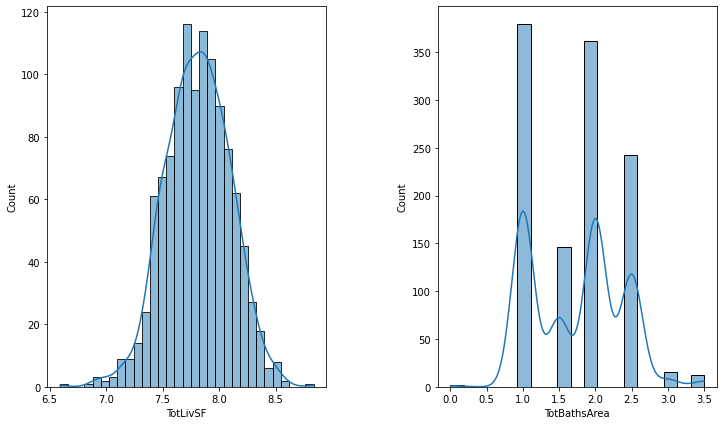

In [48]:
new_cols = ['TotLivSF', 'TotBathsArea']

fig, axes = plt.subplots(ncols=2, figsize = (12, 7))
fig.subplots_adjust(wspace=0.4)

for idx, var in enumerate(new_cols):
    vals = [row[var] 
        for row in datasets['trainDF'].select(var).collect()]
    sns.histplot(data=vals, ax=axes[idx], kde=True)
    axes[idx].set(xlabel=var)

plt.show()

Once the new features have been integrated in to the DFs, we are left with updating the list of numerical variables.

In [49]:
high_corr_num_vars = high_corr_num_vars + ['TotLivSF', 'TotBathsArea']

#### 2.7.2 Ordinal variables

Getting back to the differentiation of numerical and categorical variables, if we analyze in detail the elements of `cat_vars_est`, it can be deduced that some qualitative variables __[can actually be interpreted as ordinal categorical ones](https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/)__, on the hypothesis that the categories have some sort of defined ordering. These features are **ExterQual**, **ExterCond**, **BsmtQual**, **BsmtCond**, **HeatingQC**, **KitchenQual**, **GarageQual**, and **GarageCond** (**FireplaceQu** e **PoolQC** are also of this kind, but we have already eliminated them in the previous stages). All of such variables refer to a classification of the quality of a specific characteristic of the house, and are all encoded in the same way:

```
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
```

Therefore, these variables happen to be more useful when interpreted as numerical, due to their meaning of (ordered) 'ranking'. This interpretation will require an explicit mapping into an ordered set that keeps track of their initial information content.

In [50]:
cat_to_ord_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                        'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

# this dict defines the associations of the mapping category -> rank
cat_to_ord_dict = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

# this mapping is created upon the defined dict
mapping = create_map([lit(x) for x in chain(*cat_to_ord_dict.items())])

# the mapping is applied to the columns of interest
for name in datasets.keys():
    for var in cat_to_ord_vars:
        datasets[name] = datasets[name].withColumn(var, mapping[datasets[name][var]].cast('int'))

#### 2.7.3 **Neighborhood**
Our intuition also suggests that even the location of the house in terms of **Neighborhood** plays an important role in the value estimation and a `seaborn boxplot` is the perfect tool to validate this hypothesis.

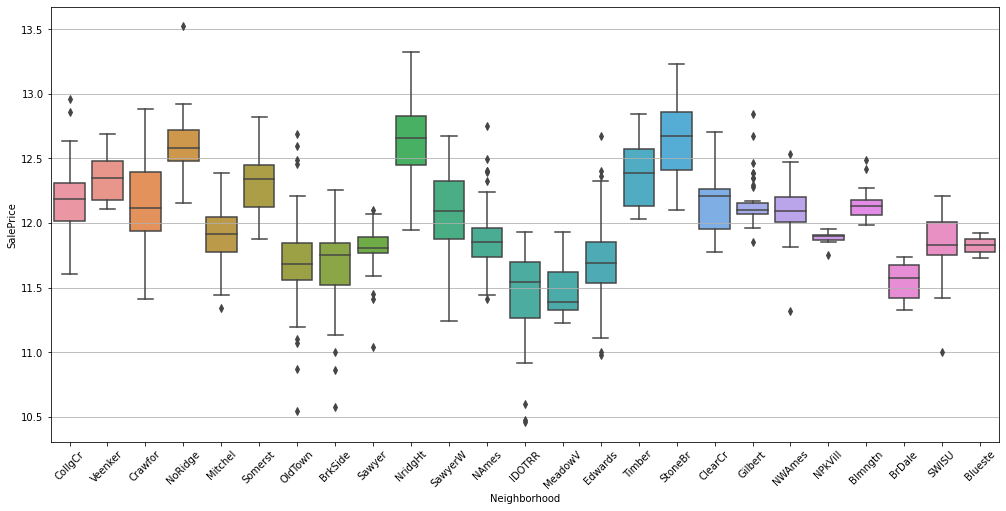

In [51]:
plt.figure(figsize=(17,8))
plt.xticks(rotation=45)
plt.grid()
sns.boxplot(x='Neighborhood', y='SalePrice', data=datasets['trainDF'].select('Neighborhood', 'SalePrice').toPandas());

The `boxplot` shows that indeed the values of **Neighborhood** are associated to different price bands. Particularly, an (ordinal) categorization of the column is the one that splits the neighborhoods in 3 groups, each with an integer sorted in relation to the quality (average prices of houses in that neighborhood). Just like section 2.7.1, we will define a mapping between the different neighborhoods and their numerical quality ranking.

In [52]:
neigh_map_dict = {'NoRidge': 2, 'NridgHt': 2, 'StoneBr': 2,
                  'CollgCr': 1, 'Veenker': 1, 'Crawfor': 1, 'Mitchel': 1, 'Somerst': 1, 'OldTown': 1,
                  'BrkSide': 1, 'Sawyer': 1, 'SawyerW': 1, 'NAmes': 1, 'Edwards': 1, 'Timber': 1,
                  'ClearCr': 1, 'Gilbert': 1, 'NWAmes': 1,'NPkVill': 1, 'Blmngtn': 1, 'SWISU': 1, 'Blueste': 1,
                  'IDOTRR': 0, 'MeadowV': 0, 'BrDale': 0}

In [53]:
# the new mapping is instantiated 
neigh_mapping = create_map([lit(x) for x in chain(*neigh_map_dict.items())])

# neigh_mapping is applied to the column
for name in datasets.keys():
    datasets[name] = datasets[name].withColumn('Neighborhood', neigh_mapping[datasets[name]['Neighborhood']].cast('int'))

In [54]:
# since we are done with the processing on the variables, 
# we can now visualize the final structure of the dataset
cat_vars_est = [item[0] for item in datasets['trainDF'].dtypes if item[1].startswith('string')]
num_vars_est = [var for var in datasets['trainDF'].columns if var not in cat_vars_est and var != 'Id']

print(f"Final estimation of the categorical variables of trainDF: {len(cat_vars_est)}\n {cat_vars_est}")
print(f"\nFinal estimation of the numerical variables of trainDF: {len(num_vars_est)}\n {num_vars_est}")

Final estimation of the categorical variables of trainDF: 28
 ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']

Final estimation of the numerical variables of trainDF: 30
 ['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'TotLivSF', 'TotBathsArea']


Once the data preprocessing is complete, the cleaned dataset is again stored on HDFS.

In [55]:
datasets['trainDF'].write.save('hdfs://localhost:9000/bigdata/houseprices/cleaned_datasets/cleaned_train.csv')
datasets['testDF'].write.save('hdfs://localhost:9000/bigdata/houseprices/cleaned_datasets/cleaned_test.csv')

# 3. Regression
The dataset analysis brought to the cleaning, correction and selection of the data relevant to our problem. The only step left is that of preparing such features to be fed as input to the regressor model training and to the final testset prediction.

### 3.1 Feature encoding
All of the veatures will need to be vectorized in a `Vector` through the `VectoAssembler` class of the `pyspark.ml.feature` module. If, on one hand, the numerical variables are already in the format to undergo this procedure, it is still necessary to explicitly encode the categorical ones by indicizing them, so that they will also be interpreted numerically by the model. This operation will we performed on each variable through the appropriate `StringIndexer`.

In [56]:
# centralizing all of the variables that we will train our model on
training_features = high_corr_num_vars + cat_vars_est

In [57]:
# a StringIndexer is instantiated for each categorical variable
indexers_list = [StringIndexer(inputCol=column, outputCol=column+'_idx', handleInvalid='keep').fit(datasets['trainDF']) 
                    for column in cat_vars_est]

In [58]:
# the data are indexed through a preprocessing Pipeline
for name in datasets.keys():
    prepr_pipeline = Pipeline(stages=indexers_list)
    datasets[name] = prepr_pipeline.fit(datasets[name]).transform(datasets[name])

In [59]:
# numerical and categorical indexed data are extracted
input_cols = [feat + '_idx' if feat in cat_vars_est else feat for feat in training_features if feat != 'SalePrice']

datasets['trainDF'] = datasets['trainDF'].select(*input_cols, 'SalePrice')
datasets['testDF'] = datasets['testDF'].select('Id', *input_cols)

In [60]:
assembler = VectorAssembler(inputCols=datasets['trainDF'].drop('SalePrice').columns, outputCol='features', handleInvalid='keep')
train_vector = assembler.transform(datasets['trainDF'])

assembler2 = VectorAssembler(inputCols=datasets['testDF'].drop('Id').columns, outputCol='features', handleInvalid='keep')
test_vector = assembler2.transform(datasets['testDF'])

### 3.2 Training and evaluation
The module `pyspark.ml.regression` provides a number of learning algorithms for the regression task. The choice of the best regressor for our task can be made among `LinearRegression`, `GeneralizedLinearRegression`, `DecisionTreeRegressor`, and`RandomForestRegressor`. Out of all of those, different trials on hyperparameter tuning showed that the `RandomForestRegressor` is the one that achieves the better performance.

In [61]:
randomForest = RandomForestRegressor(featuresCol='features', labelCol='SalePrice', maxBins=100)

For the sake of automatizing the model's hyperparameter tuning, `pyspark` has also the `ParamGridBuilder` class, which performs an exhaustive grid search training on the explicited hyperparameter space, which in this case are `numTrees` and `maxDepth`. Different studies on random forest-based regression models [__[Oshiro et al.](https://www.researchgate.net/publication/230766603_How_Many_Trees_in_a_Random_Forest)__, __[Welling S.](https://stackoverflow.com/questions/34997134/random-forest-tuning-tree-depth-and-number-of-trees)__] show that when the data are few and not too much noisy, the model tends not overfit as the number of trees grows [__[Breiman L.](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#remarks)__] and also that, from 100 trees onwards, the performance gain is approximately the same and the accuracy of the results does not improve significantly. As for the trees' depth, the optimal range for a problem like ours is between 4 and 8 layers, outside of which we may risk to increase the generalization error. The `ParamGridBuilder` will evaluate the performance of the algorithm based on the cross-validation metric, varying the hyperparameters in the ranges just discussed.

Kaggle's __[documentation](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation)__ reports that the metric used to score the competition is the **Root-Mean-Squared-Error (RMSE)** between the logarithms of the predicted value and the logarithm of the actual house price. As we have already Log-transformed the data, we will just need to specify the RMSE as the `RegressionEvaluator`'s metric for cross-validation.

In [62]:
paramGrid = ParamGridBuilder() \
    .addGrid(randomForest.numTrees, [100, 110, 120, 130, 140]) \
    .addGrid(randomForest.maxDepth, [4, 6, 8]) \
    .build()

Ideally, we would perform a **stratified** k-fold cross-validation in order to __[mitigate the issued related to the random sampling problem](https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e)__; however, `pyspark` does not include an axplicit technology to implement such technique, so we will execute a traditional cross-validation, on the hypothesis that the previous unskewing stages themselves limit these issues.

In [63]:
# we instantiate the 10-fold cross-validation on the training algorithm, the ParamGridBuilder
# and the evaluator of the regression based on the RMSE metric
crossval = CrossValidator(estimator=randomForest,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(metricName='rmse', labelCol='SalePrice'),
                          numFolds=10)

In [64]:
# training starts
cvModel = crossval.fit(train_vector)

In [65]:
# a prediciton is made on the testset
predictions = cvModel.transform(test_vector)

Once the prediction is done, the targe values are extracted and used to build the `csv` in the format specified by Kaggle for the final submission. Also, before submitting the results, we will need to bring back the predicted value sof **SalePrice** from their logarithmic form to the 'real' ones, done with an exponentiation.

In [66]:
# the submission csv will need to have just two columns, 'Id' and 'SalePrice'
submission = predictions.withColumn('prediction', exp(col('prediction'))).select('Id', col('prediction').alias('SalePrice'))

In [67]:
submission.write.save('hdfs://localhost:9000/bigdata/houseprices/submissions/submission_t8.csv')

The submission of the final prediction returns a logarithmic RMSE of 0.15498, an improvement over the last trial, that had an associated score of 0.16273.

![banner](./imgs/submission_best_.png)